

# Project: No Show Appoinments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**:This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
>
>● ‘ScheduledDay’ 

>● ‘Neighborhood’

>● ‘Age’

>● ‘Gender’

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [14]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.shape

(110527, 14)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hypertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No_show        110527 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


**There is No Missing Data **

In [17]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
negative = df[df['Age'] < 0]
negative

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> Notice here the min age is -1 but it's in 1 column so it's not  important to drop it



### Data Cleaning 

In [19]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
# dropping ScheduledDay and AppointmentDay
df.drop(['ScheduledDay','AppointmentDay','PatientId','AppointmentID	'], axis = 1 , inplace = True)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**IDs ,AppointmentDay,ScheduledDay will not affect in our analysis so i drop it

In [22]:
#rename some columns
df.rename(columns={'No-show': 'No_show' , 'Hipertension':'Hypertension'},inplace = True)

In [75]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,Female,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,Male,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,Female,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,Female,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,Female,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df.Gender.replace({"F":"Female" , "M":"Male"}, inplace = True)
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,Female,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> 

### A general look on the data

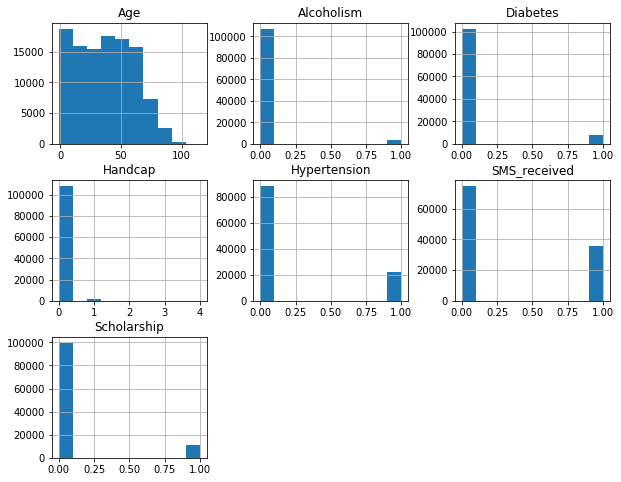

In [78]:
df.hist(figsize=(10,8));

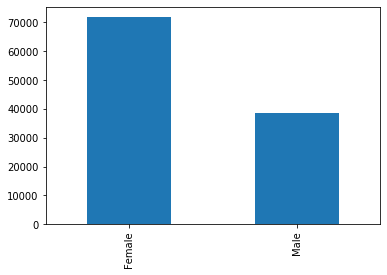

In [83]:
df['Gender'].value_counts().plot(kind = 'bar');

In [26]:
df.groupby(['Gender' , 'No_show']).size()

Gender  No_show
Female  No         57246
        Yes        14594
Male    No         30962
        Yes         7725
dtype: int64

In [29]:
df.groupby(['Gender' , 'No_show']).size().unstack("Gender")

Gender,Female,Male
No_show,,
No,57246,30962
Yes,14594,7725


In [30]:
df.groupby(['Gender' , 'No_show']).size().unstack("Gender").apply(lambda x: x/x.sum())

Gender,Female,Male
No_show,,
No,0.796854,0.800321
Yes,0.203146,0.199679


**The Percentage between Male & Female who showed or not 

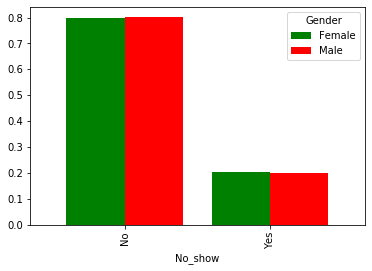

In [35]:
(df.groupby(['Gender' , 'No_show']).size().unstack("Gender").apply(lambda x: x/x.sum()).plot.bar( width = 0.8 , color = ['green','red']));

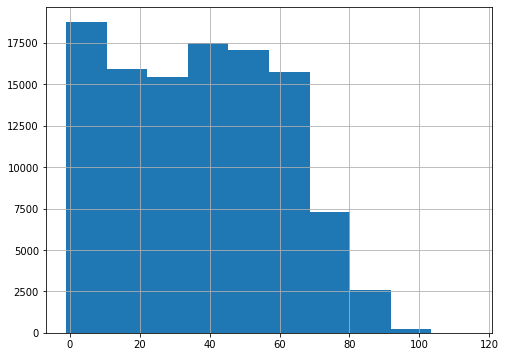

In [79]:
df['Age'].hist(figsize=(8,6));


**The Distribution of Ages


In [43]:
No=df['No_show'] == 'No'     #Those are the people who show
Yes=df['No_show'] == 'Yes'   #Those are the people who  no show
df[No].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [44]:
df[Yes].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

# Here we will see if any parameter affect directly on show\not show 

In [3]:
def Myhist(df,var):
    plt.figure(figsize = [13,8]);
    df[var][Yes].hist(alpha = 0.6 , label = ' No Show' , color = 'orange' ,align = 'left')
    df[var][No].hist(alpha = 0.6 , label = 'Show' , color = 'green' ,align = 'right')
    plt.xlabel(f'{var}'.title())
    plt.ylabel('NUMBER OF PATIENT')
    plt.title(f'Distribution of No show /show according to {var}')
    plt.legend()

**Difining a Function take the dataset and a variable to build a distribution

In [4]:
Myhist(df,'Gender')

NameError: name 'df' is not defined

**Here it seems to be normal

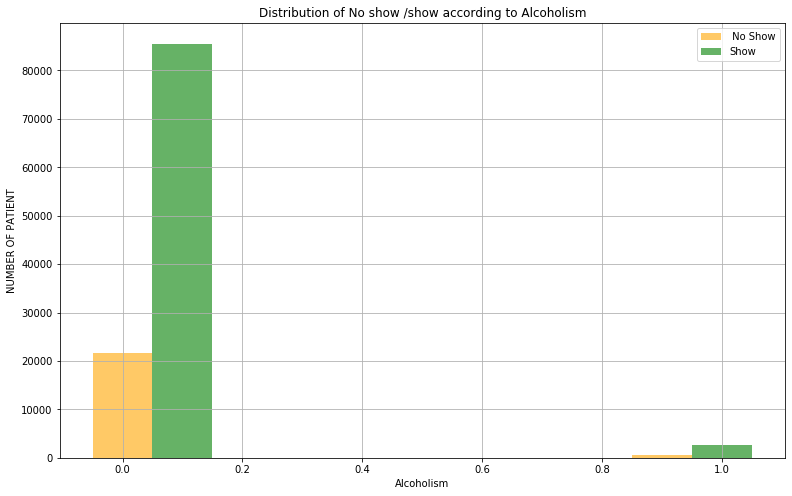

In [52]:
Myhist(df,'Alcoholism')

**Also here seems to be normal

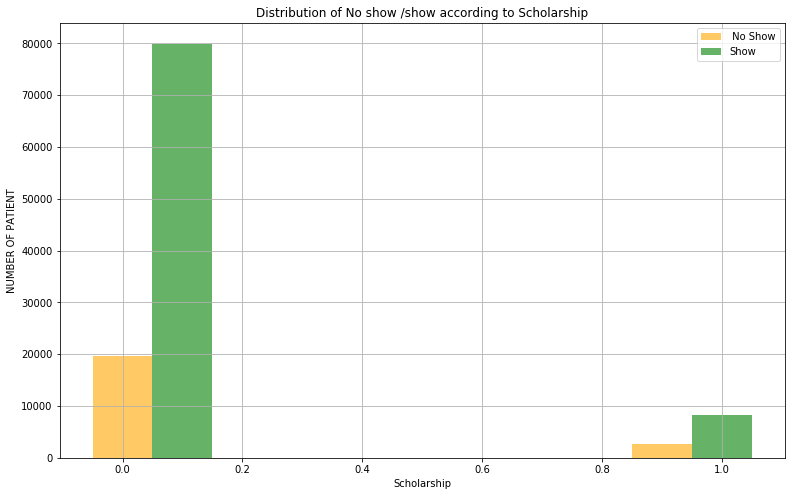

In [53]:
Myhist(df,'Scholarship')

**Also here seems normal

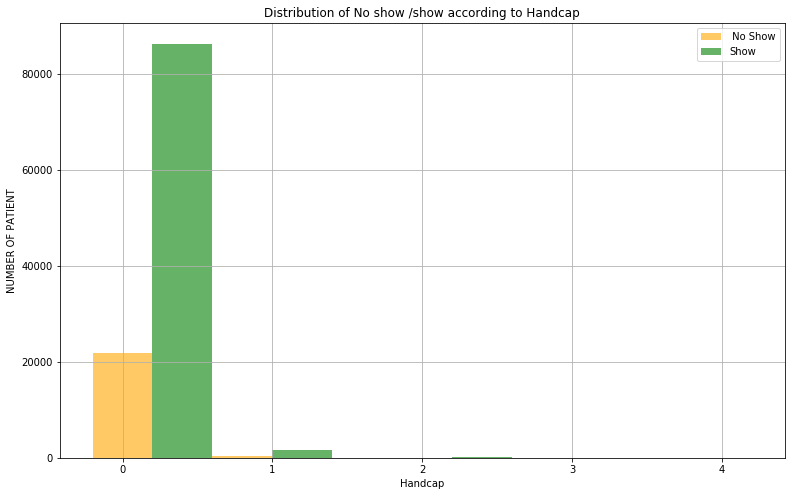

In [54]:
Myhist(df,'Handcap')

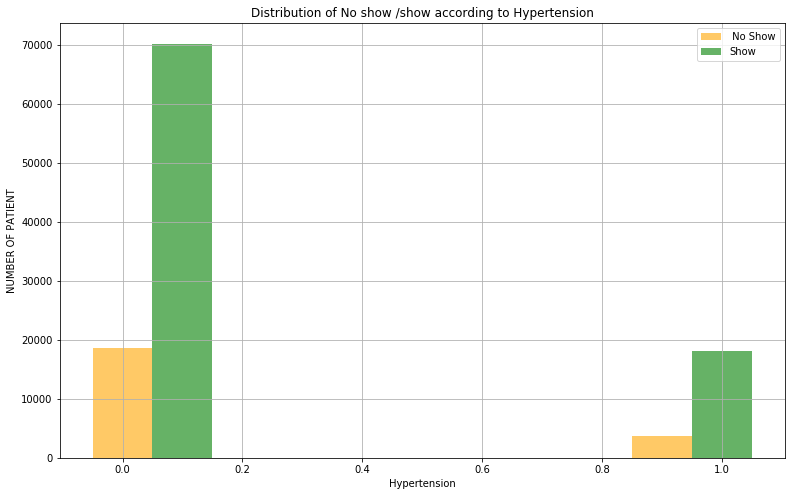

In [56]:
Myhist(df,'Hypertension')

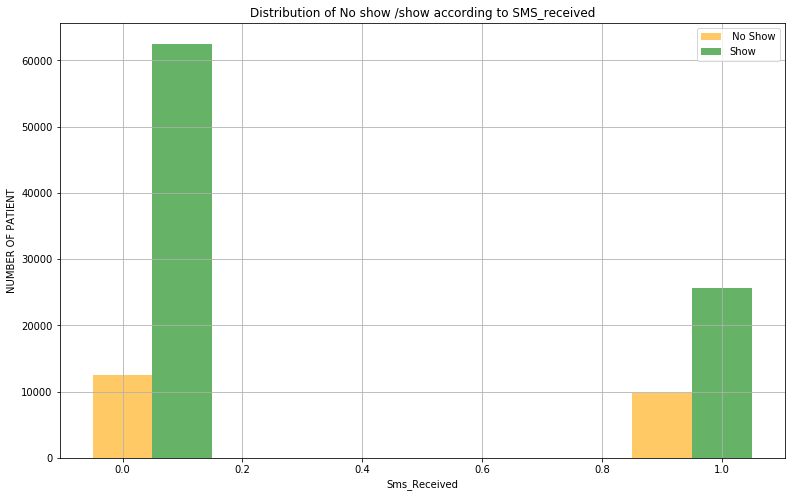

In [61]:
Myhist(df,'SMS_received')

**Here Something Strange here that majority of people who didn't receive a message they show appoinments

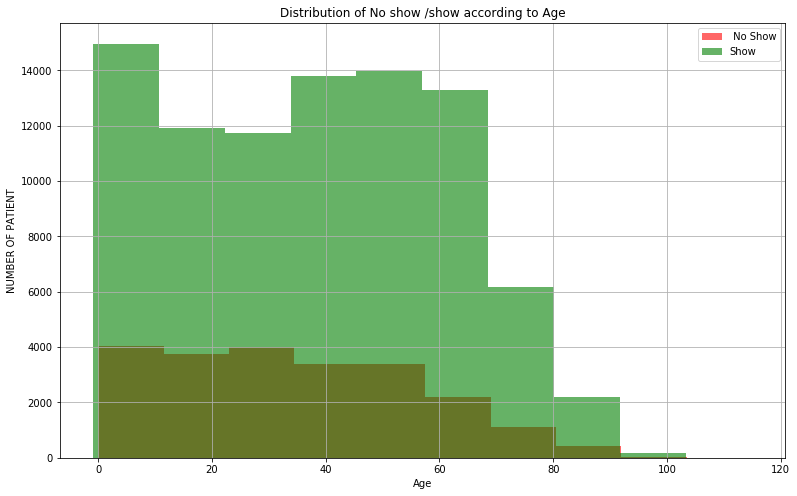

In [85]:
plt.figure(figsize = [13,8]);
df['Age'][Yes].hist(alpha = 0.6 , label = ' No Show' , color = 'red' )
df['Age'][No].hist(alpha = 0.6 , label = 'Show' , color = 'green' )
plt.xlabel('Age')
plt.ylabel('NUMBER OF PATIENT')
plt.title(f'Distribution of No show /show according to Age')
plt.legend()

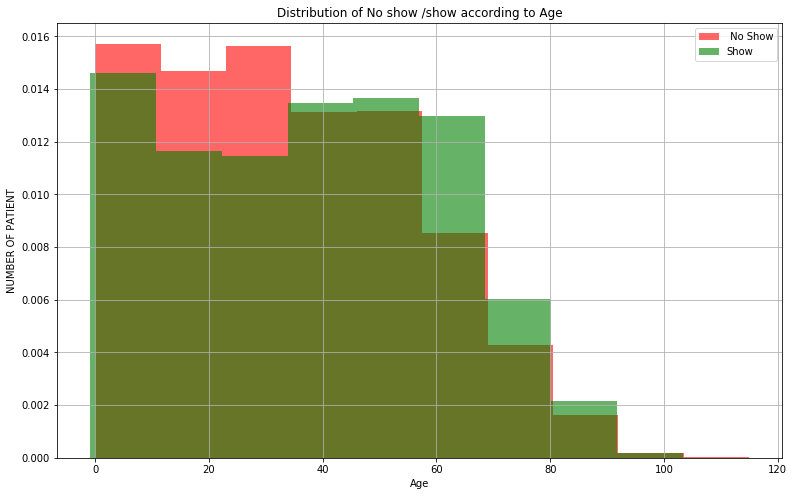

In [64]:
plt.figure(figsize = [13,8]);
df['Age'][Yes].hist(alpha = 0.6 , label = ' No Show' , color = 'red' ,density = True)
df['Age'][No].hist(alpha = 0.6 , label = 'Show' , color = 'green' ,density = True)
plt.xlabel('Age')
plt.ylabel('NUMBER OF PATIENT')
plt.title(f'Distribution of No show /show according to Age')
plt.legend()

**This is the distribution of the ages but with relaltive frequency

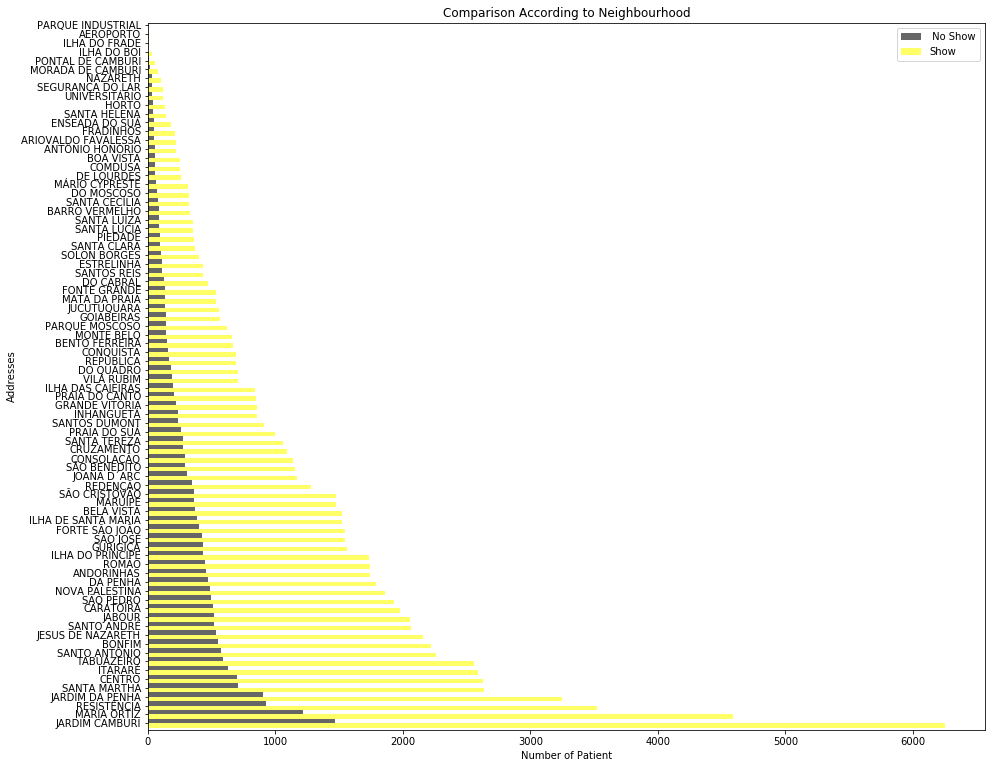

In [73]:
plt.figure(figsize = [13,8]);
df.Neighbourhood[Yes].value_counts().plot(kind = 'barh' , figsize = (15,13),alpha = 0.6 , label = ' No Show' , color = 'black' , position = 0)
df.Neighbourhood[No].value_counts().plot(kind = 'barh' ,figsize = (15,13),alpha = 0.6 , label = 'Show' , color = 'yellow' ,position =1)
plt.xlabel('Number of Patient')
plt.ylabel('Addresses')
plt.title('Comparison According to Neighbourhood')
plt.legend()

<a id='conclusions'></a>
## Conclusions

> **Tip**:Most of Parameters have the same Propotion

> **Tip**: i think age and neighbourhood effect mostly in show 


'C:\\Users\\lenovo 320\\Desktop\\py'